**Importing necessary dependencies**

Please note; Model Building as with most areas in Data Science, is iterative. Only after is the process reviewed and documented accordingly. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
#loading dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**E.D.A.**

In [28]:
data.info()
print("//////////////////////////////////////////////")
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [4]:
#search for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.duplicated().sum()

1081

In [6]:
data = data.drop_duplicates()

In [29]:
data.duplicated().sum()

0

In [8]:
# ratio of legit & fraudulent transactions
#where 0 --> Normal Transaction and 1 --> fraudulent transaction
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [9]:
print('Legit', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Legit 99.83 % of the dataset
Frauds 0.17 % of the dataset


The data is Unbalanced with Normal transactions carrying more data. 

A good way to work around this, is by using the SAMPLING METHOD(UNDER OR OVER). Each one has it's pros as well as cons.

But in this case, we will use the UNDER-SAMPLING. To prevent risk of over-fitting since the disparity between the two classes is too large.

**Feature Engineering**

In [10]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [12]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


**Sampling**

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
#concatenating the two dataset
new_data = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134086,80641.0,1.266632,-0.291235,-0.954074,-0.281652,1.850795,3.679324,-0.736356,0.911196,0.515491,...,-0.159518,-0.382894,-0.108739,1.058807,0.705316,0.426010,-0.012903,0.006256,12.36,0
256691,157811.0,1.971916,-0.388731,-0.624007,0.170156,-0.277734,-0.191131,-0.400978,-0.054359,0.906613,...,-0.258970,-0.716361,0.400668,0.484287,-0.572348,0.209081,-0.045735,-0.031929,41.97,0
152208,97099.0,2.136669,0.180392,-2.231482,0.100250,0.888034,-1.188058,0.679092,-0.589621,1.503835,...,-0.019487,0.265588,-0.045746,0.469632,0.467817,0.183188,-0.121481,-0.078628,19.61,0
233726,147681.0,2.005137,0.159149,-1.717809,0.555673,0.160513,-1.512033,0.337999,-0.427064,0.525703,...,0.217104,0.762318,-0.047857,-0.004881,0.256021,-0.108237,-0.004752,-0.025479,30.28,0
164569,116822.0,-1.105803,0.072578,-0.305665,-1.340418,-2.525203,1.288105,2.383106,-0.728239,-1.090261,...,0.089116,0.964452,-0.367124,-0.291703,-0.352144,-0.058650,-0.226283,0.122498,517.43,0


In [18]:
new_data['Class'].value_counts()

Class
0    492
1    473
Name: count, dtype: int64

In [19]:
#shuffling the data ensuring randomness
new_dataset = new_data.sample(frac=1, random_state=1).reset_index(drop=True)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,66813.0,0.944943,-0.771195,-0.480701,0.692596,1.502994,4.429403,-0.884032,1.120380,1.126154,...,-0.424542,-1.211657,-0.085908,1.001435,0.609808,-0.536257,0.053628,0.046099,131.42,0
1,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
2,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1
3,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
4,40681.0,-1.704980,-0.753351,2.131179,-2.718527,-0.616468,-0.164835,0.376951,-0.721038,-1.529058,...,-0.401006,0.523273,-0.005864,0.032972,0.617745,-0.232449,-0.008934,-0.452095,86.00,0


In [20]:
new_dataset['Class'].value_counts()

Class
0    492
1    473
Name: count, dtype: int64

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, Y.shape, Y_train.shape, Y_test.shape, X_train.shape, X_test.shape)

(965, 30) (965,) (772,) (193,) (772, 30) (193, 30)


**Model Training**

In [25]:
def train_model(X_train, X_test, y_train, y_test):
    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")
    
        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score: {roc_auc}\n")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[112   6]
 [  7  68]]


Accuracy: 0.9326424870466321


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       118
           1       0.92      0.91      0.91        75

    accuracy                           0.93       193
   macro avg       0.93      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193


ROC-AUC Score: 0.927909604519774



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


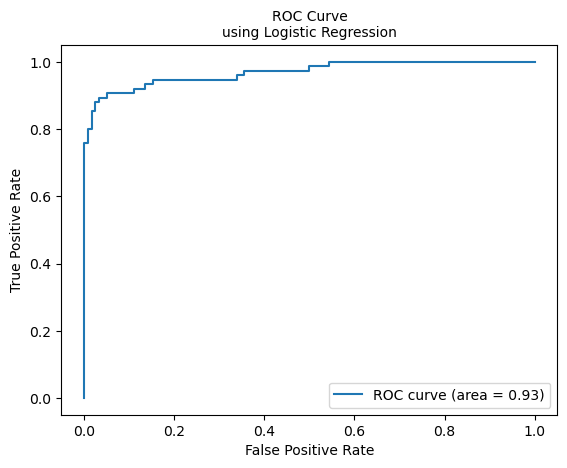




================ Decision Tree Classifier ================

Confusion Matrix:
[[101  17]
 [  6  69]]


Accuracy: 0.8808290155440415


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       118
           1       0.80      0.92      0.86        75

    accuracy                           0.88       193
   macro avg       0.87      0.89      0.88       193
weighted avg       0.89      0.88      0.88       193


ROC-AUC Score: 0.8879661016949152



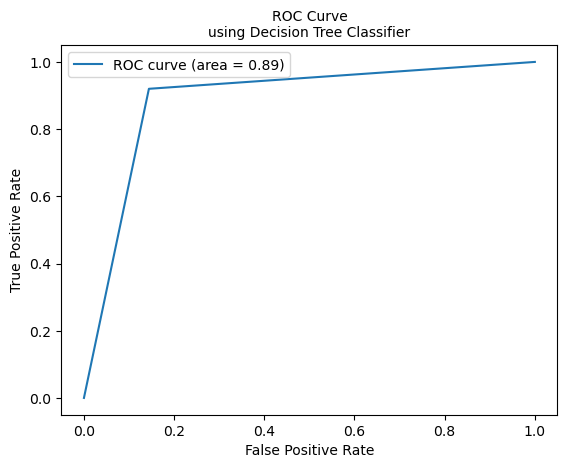




================ RandomForestClassifier ================

Confusion Matrix:
[[114   4]
 [  8  67]]


Accuracy: 0.9378238341968912


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.94      0.89      0.92        75

    accuracy                           0.94       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.94      0.94      0.94       193


ROC-AUC Score: 0.9297175141242938



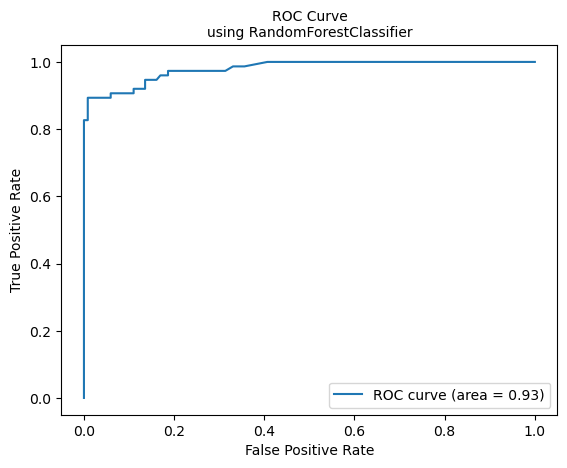

In [26]:
train_model(X_train, X_test, Y_train, Y_test)

**Logistic Regression**

In [31]:
model = LogisticRegression()

In [32]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

In [37]:
# accuracy score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy Score:", round(training_data_accuracy * 100, 2))

Accuracy Score: 94.95


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy Score on test data:", round(test_data_accuracy * 100, 2))

Accuracy Score on test data: 93.26
